In [1]:
# Import the relevant packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap # For the colored decision regions

# Código para ADALINE

Basándonos en el código del perceptrón, construimos el sistema de ADALINE. Hay que cambiar:
* La función de entrenamiento
* El resultado que devuelve el sistema (pasa a ser un sistema de regresión, no clasificación)

In [2]:
# Build the perceptron as an object

class adaline(object):
    """ADALINE regression model.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_epochs : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Errors in every epoch.

    """
    def __init__(self, alpha = 1.0, n_iter = 100): 
        self.alpha = alpha
        self.n_iter = n_iter
    
    
    def fit(self, X, y, weight_init = []):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        weight_init : list
            Passes an initialization for the weights
            
        Returns
        -------
        self : object

        """
        # Initialize weights as zeros of size 1 + number of features, errors as empty list
        if len( weight_init ) == 0:
            self.w_ = np.zeros(1 + X.shape[1])  # Add the extra dimension to make room for the bias component
        else:
             self.w_ = np.array(weight_init)   
        
        self.cost_ = []                   # Empty list to store the errors during training 
        
        for k in range(self.n_iter):
            
            tmp_error_ = 0.0
            
            for i in range(len(X)):
                                
                # Pass a point to ADALINE and process it
                output = self.adaline_output(X[i,:])
                error = (y[i] - output)
                
                # Update the weights according to the Delta rule
                self.w_[1:] += self.alpha * X[i,:]*error
                self.w_[0] += self.alpha * error
                tmp_error_ += 0.5 * np.sum((y - self.adaline_output(X))**2)
            
            self.cost_.append(tmp_error_)
            
            # Since now it is regression, zero error will be difficult. 
            # However, we can keep this check just in case...
            if (error.sum() == 0):
                break
        
        print(f'Pesos tras entrenar {self.n_iter} épocas: {self.w_}')

        return self

    
    
    def adaline_output(self, X):
        
        # Calculate net output
        return np.dot(X, self.w_[1:]) + self.w_[0]        # Linear transformation of the input
    


## Conversión de datos binarios a decimales

Construimos el dataset para la conversión de binario a decimal (no incluimos el caso de (0,0,0) = (0) siguiendo las indicaciones del enunciado)

In [3]:
d = {'b1': [0, 0, 0, 1, 1, 1, 1], 
     'b2': [0, 1, 1, 0, 0, 1, 1],
     'b3': [1, 0, 1, 0, 1, 0, 1],
     'dec': [1, 2, 3, 4, 5, 6, 7]}
df = pd.DataFrame(data=d)
df

,b1,b2,b3,dec
0,0,0,1,1
1,0,1,0,2
2,0,1,1,3
3,1,0,0,4
4,1,0,1,5
5,1,1,0,6
6,1,1,1,7


Separamos y guardamos el target (valor decimal) para reutilizar la estructura del caso del perceptrón

In [4]:
# Select the two classes
y = df.dec.values           # values method of a pandas dataframe yields Numpy array

# select two features: sepal length and petal length for visualization
X = df.iloc[:,0:3].values

In [5]:
y

array([1, 2, 3, 4, 5, 6, 7])

Dibujamos los puntos que nos quedan

# Entrenamiento y plots de resultados

Pesos tras entrenar 50 épocas: [5.91673382e-05 3.99998102e+00 1.99998241e+00 9.99982485e-01]


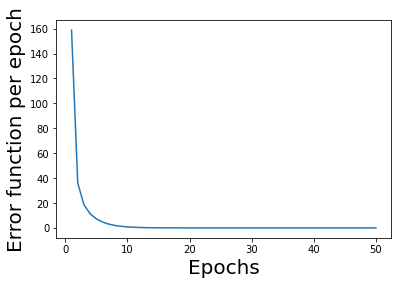

Necesitamos 30 épocas para que el método converja con una tolerancia de 0.0001


In [6]:
# First, create the object with the model
model = adaline(alpha = 0.3, n_iter = 50)

# Fit the model using the parameters given in the problem
weight_init = [0., 0.84, 0.39, 0.78]
model.fit(X, y) # , weight_init)

# plot the error for each epoch to check for convergence
plt.plot(range(1, len(model.cost_)+1), model.cost_)
plt.xlabel('Epochs', fontsize = 20)
plt.ylabel('Error function per epoch',  fontsize = 20)
plt.show()

# Find when the error is lower than a certain tolerance level
tolerance = 0.0001   
cutoff = np.where(np.array(model.cost_) < tolerance)[0][0]
print(f"Necesitamos {cutoff} épocas para que el método converja con una tolerancia de {tolerance}")